In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data.csv')

In [13]:
df.head()

,price,car_ID,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,mpg
0,13495.0,1,gas,alfa-romero,std,two,convertible,fwd,front,88.6,168.8,64.1,48.8,2548,four,111,27
1,16500.0,2,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111,27
2,16500.0,3,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,154,26
3,13950.0,4,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,102,30
4,17450.0,5,gas,audi,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,five,115,22


In [14]:
df.isnull().sum()

price             0
car_ID            0
fueltype          0
CompanyName       0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
cylindernumber    0
horsepower        0
mpg               0
dtype: int64

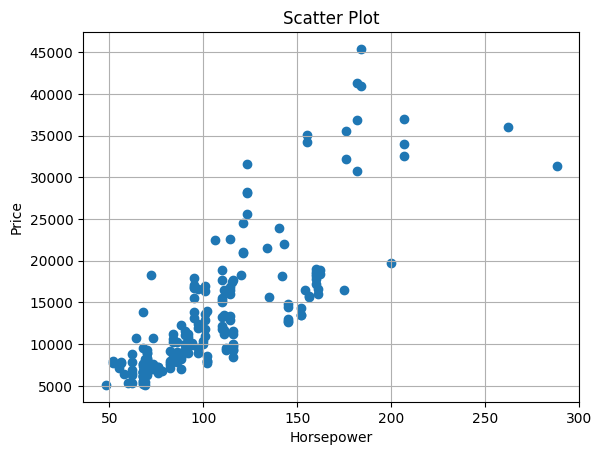

In [15]:
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

X = df['horsepower'].values.reshape(-1, 1)
y = df['price'].values

model = LinearRegression()
model.fit(X, y)

price_pred = model.predict(X)



R-squared: 0.6531


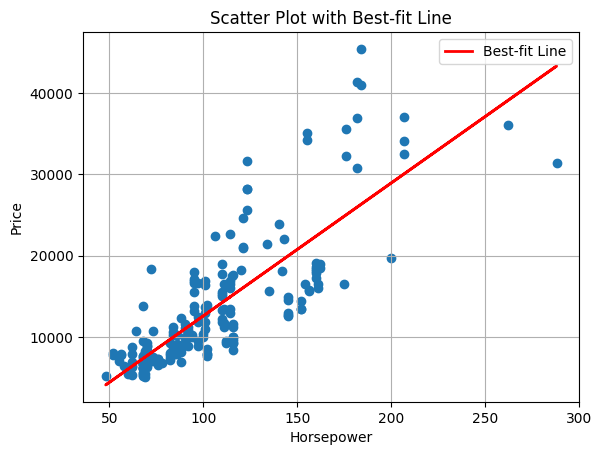

In [17]:
plt.scatter(df['horsepower'], df['price'])
plt.plot(X, price_pred, color='red', linewidth=2, label='Best-fit Line')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot with Best-fit Line')
plt.legend()
plt.grid(True)
plt.show()

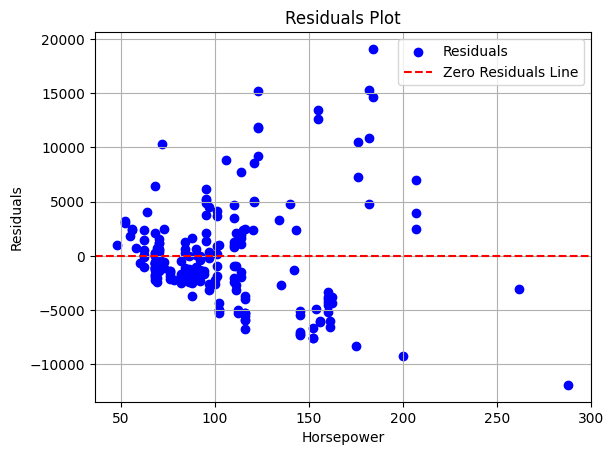

In [18]:
residuals = y - price_pred
plt.scatter(X, residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()


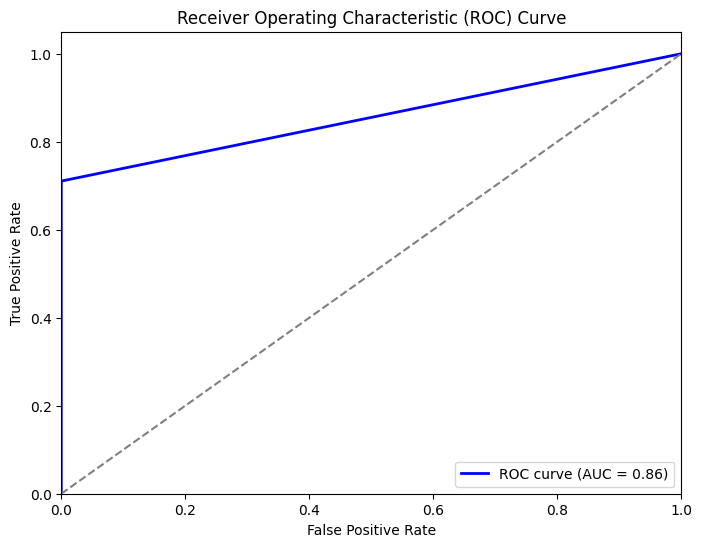

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = (df['drivewheel'] == 'fwd').astype(int).values.reshape(-1, 1)
y = (df['price'] > df['price'].mean()).astype(int)
model = LogisticRegression()
model.fit(X,y)
y_pred = model.predict(X)

fpr, tpr, thresholds = roc_curve(y, y_pred)
auc_value = roc_auc_score(y, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for columns in df.select_dtypes(include=['object']):
    df[columns] = label_encoder.fit_transform(df[columns])
    
df.head()

,price,car_ID,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,mpg
0,13495.0,1,1,0,0,1,0,0,0,88.6,168.8,64.1,48.8,2548,2,111,27
1,16500.0,2,1,0,0,1,0,1,0,88.6,168.8,64.1,48.8,2548,2,111,27
2,16500.0,3,1,0,0,1,2,1,0,94.5,171.2,65.5,52.4,2823,3,154,26
3,13950.0,4,1,1,0,0,3,0,0,99.8,176.6,66.2,54.3,2337,2,102,30
4,17450.0,5,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,1,115,22


In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
-

SyntaxError: invalid syntax (1022456607.py, line 4)

In [22]:
y = df['price']
X = df[['horsepower','curbweight', "carlength","carwidth", "wheelbase", "drivewheel", "mpg"]]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

rmse = mean_squared_error(y, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 2223.9696161232096
Root Mean Squared Error (RMSE): 3345.2718098015703


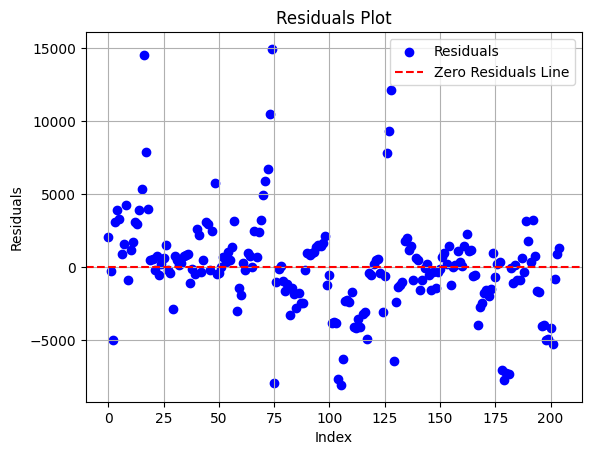

In [24]:
residuals = y - y_pred
index = np.arange(len(residuals))
plt.scatter(index, residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
y = df['price']
X = df[['mpg']]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

rmse = mean_squared_error(y, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 4161.013857325482
Root Mean Squared Error (RMSE): 5709.94151009316


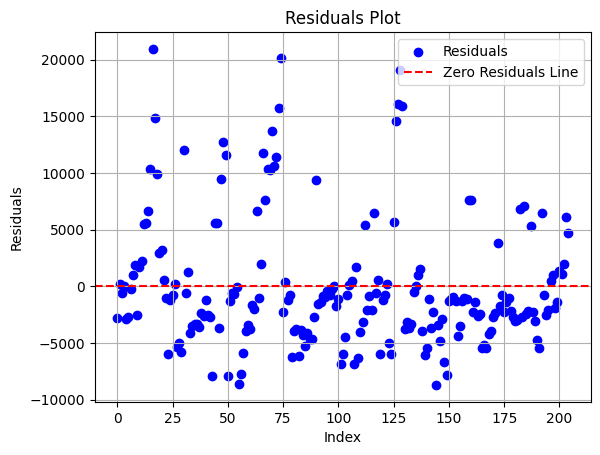

In [27]:
residuals = y - y_pred
index = np.arange(len(residuals))
plt.scatter(index, residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals Line')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()